In [2]:
library(tidymodels)
library(tidyverse)
library(gridExtra)
players_file=read_csv("data/players.csv")
players_file

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ recipes      1.1.0
✔ dials        1.3.0     ✔ rsample      1.2.1
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.1.2
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.0.1
✔ purrr        1.0.2     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ lubridate 1.9.3     ✔ stringr   1.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


Predicting Minecraft Player Experience Based on Age and Played Hours

# Introduction

## Background

Frank Wood leads a research group at the University of British Columbia that collects behavioral data from online Minecraft gamers. This research aims to understand player behavior to improve recruitment efforts and manage server resources efficiently.

One key challenge is identifying which players are likely to contribute large amounts of gameplay data, which usually correlates with higher levels of engagement and experience.

## Research Question

Can a player's **total played hours** and **age** be used to predict their level of experience?

## Dataset Description

We use two datasets:
- **players.csv** — contains individual player information
- **sessions.csv** — contains individual session information

For this project, we focus on `players.csv` since it includes:
- `experience` (categorical; response variable)
- `played_hours` (numeric; explanatory variable)
- `Age` (numeric; explanatory variable)

Summary of variables:

| Variable | Type | Description |
| -------- | ---- | ----------- |
| experience | Categorical (Low, Medium, High) | Player experience level |
| played_hours | Numeric | Total number of hours the player spent playing |
| Age | Numeric | Player's age |

In [3]:
selected_file=select(players_file, experience,played_hours,Age)
selected_file

experience,played_hours,Age
<chr>,<dbl>,<dbl>
Pro,30.3,9
Veteran,3.8,17
Veteran,0.0,17
Amateur,0.7,21
Regular,0.1,21
Amateur,0.0,17
Regular,0.0,19
Amateur,0.0,21
Amateur,0.1,17


In [16]:
#identify that experience is a categorical value
selected_file=selected_file|>
mutate(experience=as_factor(experience))
print(categorical_experinece)
# Check for missing values
colSums(is.na(selected_file))

# A tibble: 196 × 3
   experience played_hours   Age
   <fct>             <dbl> <dbl>
 1 Pro                30.3     9
 2 Veteran             3.8    17
 3 Veteran             0      17
 4 Amateur             0.7    21
 5 Regular             0.1    21
 6 Amateur             0      17
 7 Regular             0      19
 8 Amateur             0      21
 9 Amateur             0.1    17
10 Veteran             0      22
# ℹ 186 more rows


experience played_hours          Age 
           0            0            2

List of 4
 $ data  : tibble [196 × 3] (S3: tbl_df/tbl/data.frame)
  ..$ experience  : chr [1:196] "Pro" "Veteran" "Veteran" "Amateur" ...
  ..$ played_hours: num [1:196] 30.3 3.8 0 0.7 0.1 0 0 0 0.1 0 ...
  ..$ Age         : num [1:196] 9 17 17 21 21 17 19 21 17 22 ...
 $ in_id : int [1:145] 1 4 14 16 18 22 25 29 33 34 ...
 $ out_id: logi NA
 $ id    : tibble [1 × 1] (S3: tbl_df/tbl/data.frame)
  ..$ id: chr "Resample1"
 - attr(*, "class")= chr [1:3] "initial_split" "mc_split" "rsplit"


# A tibble: 145 × 3
   experience played_hours   Age
   <chr>             <dbl> <dbl>
 1 Pro                30.3     9
 2 Amateur             0.7    21
 3 Amateur             0.2    22
 4 Amateur             0      22
 5 Amateur            48.4    17
 6 Amateur             0.1    17
 7 Amateur             0.7    21
 8 Amateur             1.8    23
 9 Amateur             0      17
10 Amateur             0      33
# ℹ 135 more rows


In [8]:
print(test_set)

# A tibble: 51 × 3
   experience played_hours   Age
   <chr>             <dbl> <dbl>
 1 Amateur             0      17
 2 Regular             0      19
 3 Amateur             0      21
 4 Amateur             0.1    17
 5 Veteran             0      17
 6 Beginner            0      17
 7 Amateur             0.5    17
 8 Regular             0.3     8
 9 Beginner            0      17
10 Amateur             0.1    23
# ℹ 41 more rows


In [10]:
check_proportions=test_set|>
group_by(experience)|>
summarize(n=n())|>
mutate(prcent=100*n/nrow(test_set))
check_proportions

experience,n,prcent
<chr>,<int>,<dbl>
Amateur,16,31.372549
Beginner,9,17.647059
Pro,4,7.843137
Regular,9,17.647059
Veteran,13,25.490196


Next, to visualize the relationships between variables, i will be creating 2 plots. One for played hours vs time, and the other is Age Vs experience

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


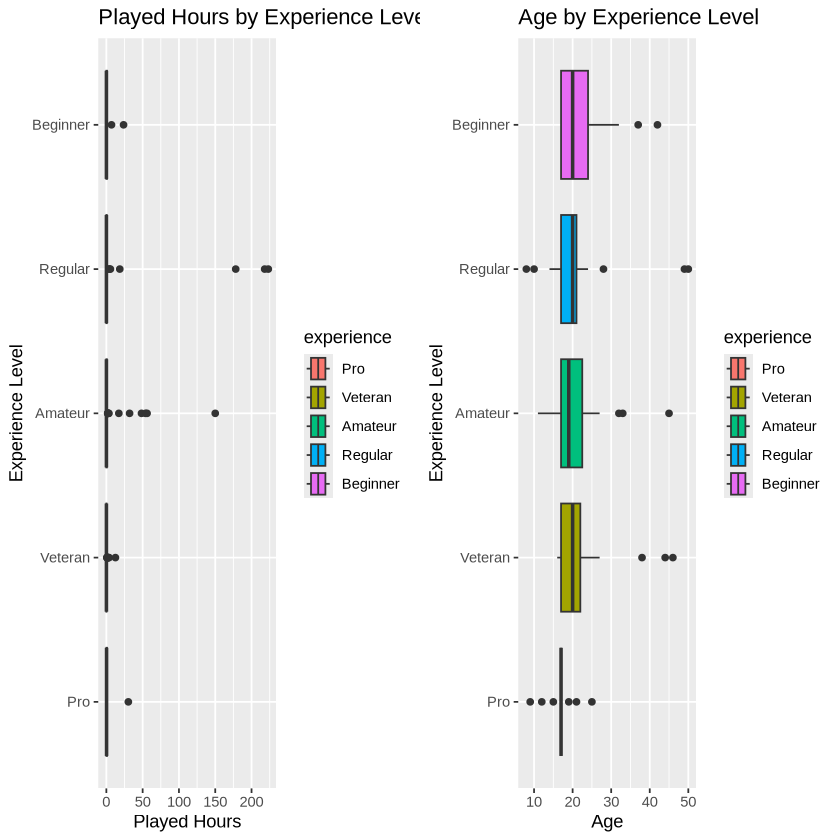

In [30]:
#for better visualization, the boxplot axises were switched
# experience vs played_hours 
plot1 <- ggplot(selected_file, aes(y = experience, x = played_hours, fill = experience)) +
  geom_boxplot() + 
  labs(title = "Played Hours by Experience Level", x = "Played Hours", y = "Experience Level",
  axis.text.x = element_text(size = 14, angle = 45, hjust = 1))
  
#  experience vs Age
plot2 <- ggplot(selected_file, aes(y = experience, x = Age, fill = experience)) +
  geom_boxplot() + 
  labs(title = "Age by Experience Level",y = "Experience Level", x = "Age",
  axis.text.x = element_text(size = 14, angle = 45, hjust = 0.5 ))

# Show both plots side by side
grid.arrange(plot1, plot2, ncol = 2)

there appears to be no relationship between played hours and experience????


In [31]:
set.seed(123)
split_file <- initial_split(selected_file, prop = 0.75, strata = experience)
training_set <- training(split_file)
test_set <- testing(split_file)

# Checking proportions in training set
training_set %>%
  group_by(experience) %>%
  summarize(n = n()) %>%
  mutate(percent = 100 * n / nrow(training_set))

# Check proportions in test set
test_set %>%
  group_by(experience) %>%
  summarize(n = n()) %>%
  mutate(percent = 100 * n / nrow(test_set))

experience,n,percent
<fct>,<int>,<dbl>
Pro,8,5.555556
Veteran,36,25.000000
Amateur,47,32.638889
Regular,28,19.444444
Beginner,25,17.361111


experience,n,percent
<fct>,<int>,<dbl>
Pro,6,11.53846
Veteran,12,23.07692
Amateur,16,30.76923
Regular,8,15.38462
Beginner,10,19.23077
